In [1]:
from sertit import AnyPath, rasters
from sertit.unistra import unistra_s3

with unistra_s3():
    pth = AnyPath("s3://sertit-sertit-utils-ci/tutorials/getting_started/image.tif")
    r = rasters.read(pth)

In [2]:
r[0:2, :, :]

<xarray.DataArray 'image' (band: 2, y: 1497, x: 2224)> Size: 27MB
dask.array<getitem, shape=(2, 1497, 2224), dtype=float32, chunksize=(1, 122, 2224), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 16B 1 2
  * x            (x) float64 18kB 3.487e+05 3.487e+05 ... 3.931e+05 3.931e+05
  * y            (y) float64 12kB 3.965e+06 3.965e+06 ... 3.935e+06 3.935e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

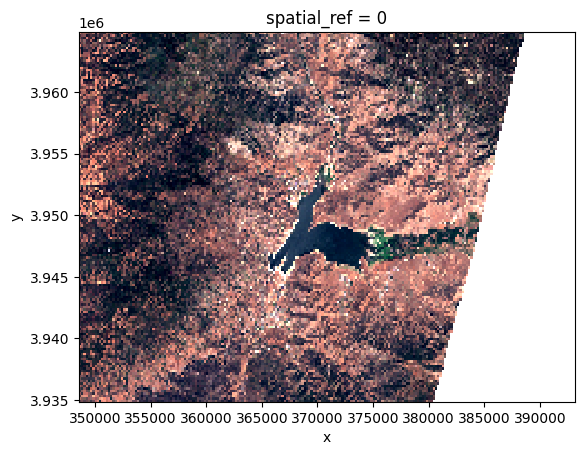

In [3]:
r[0:3, ::10, ::10].plot.imshow(robust=True)

In [4]:
r.data

dask.array<where, shape=(5, 1497, 2224), dtype=float32, chunksize=(1, 122, 2224), chunktype=numpy.ndarray>

In [5]:
# Print x and y coordinates
print("X coordinates:\n", r.x)
print("\n\nY ccordinates: ", r.y)

X coordinates:
 <xarray.DataArray 'x' (x: 2224)> Size: 18kB
array([348659.997752, 348679.993255, 348699.988759, ..., 393070.011241,
       393090.006745, 393110.002248])
Coordinates:
  * x            (x) float64 18kB 3.487e+05 3.487e+05 ... 3.931e+05 3.931e+05
    spatial_ref  int64 8B 0


Y ccordinates:  <xarray.DataArray 'y' (y: 1497)> Size: 12kB
array([3964760.00334, 3964740.01002, 3964720.0167 , ..., 3934889.9833 ,
       3934869.98998, 3934849.99666])
Coordinates:
  * y            (y) float64 12kB 3.965e+06 3.965e+06 ... 3.935e+06 3.935e+06
    spatial_ref  int64 8B 0


In [6]:
# print the value of the pixels in the image
r.data

dask.array<where, shape=(5, 1497, 2224), dtype=float32, chunksize=(1, 122, 2224), chunktype=numpy.ndarray>

In [7]:
# The spatial reference is stored in the coordinates of our raster and not in attributes !
r.spatial_ref

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    spatial_ref:   PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_...
    crs_wkt:       PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_...
    GeoTransform:  348650.0 19.9955035971223 0.0 3964770.0 0.0 -19.9933199732...

In [8]:
# So finally what are the attributes of our array ?
r.attrs
# Ok not really interisting...

{'AREA_OR_POINT': 'Area', 'scale_factor': 1.0, 'add_offset': 0.0}

In [9]:
from sertit import vectors

with unistra_s3():
    aoi_path = AnyPath("s3://sertit-sertit-utils-ci/tutorials/getting_started/aoi.shp")
    aoi = vectors.read(aoi_path)

In [10]:
aoi

,id,geometry
0,NaN,"POLYGON ((366868.619 3952756.559, 376331.609 3..."


In [11]:
aoi.explore()

In [12]:
print(type(aoi))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [13]:
print("Estimate CRS is: ", aoi.estimate_utm_crs())

Estimate CRS is:  EPSG:32611


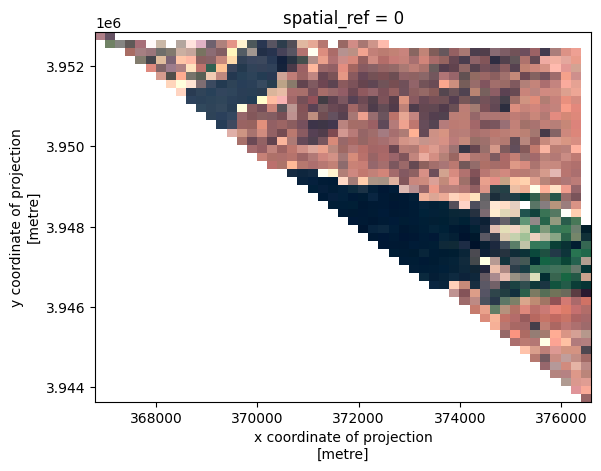

In [14]:
crop_image = rasters.crop(r, aoi)
crop_image[0:3, ::10, ::10].plot.imshow(robust=True)

In [15]:
rasters.write(crop_image, "crop_image.tif")

In [16]:
import xarray

from sertit import AnyPath, rasters
from sertit.unistra import unistra_s3

with unistra_s3():
    pth = AnyPath(
        "s3://sertit-sertit-utils-ci/tutorials/getting_started/MeanSoilLoss.tif"
    )
    r = rasters.read(pth)

conditions = [
    (r.data < 6.7),
    (r.data >= 6.7) & (r.data < 11.2),
    (r.data >= 11.2) & (r.data < 22.4),
    (r.data >= 22.4) & (r.data < 33.6),
    (r.data >= 33.6),
]
for i, condition in enumerate(conditions):
    r.data = xarray.where(condition, i + 1, r.data)

In [17]:
# dask array processes are lazy. The cell above does not perform anything.
# We can explicitely call compute() to load the result in memory
# but some methods implicitely call it (plot, write)
# r = r.compute()

In [18]:
r

<xarray.DataArray 'MeanSoilLoss' (band: 1, y: 1820, x: 1819)> Size: 26MB
dask.array<where, shape=(1, 1820, 1819), dtype=float64, chunksize=(1, 1820, 1819), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 3.624e+05 3.625e+05 ... 3.806e+05 3.806e+05
  * y            (y) float64 15kB 5.381e+06 5.381e+06 ... 5.363e+06 5.363e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

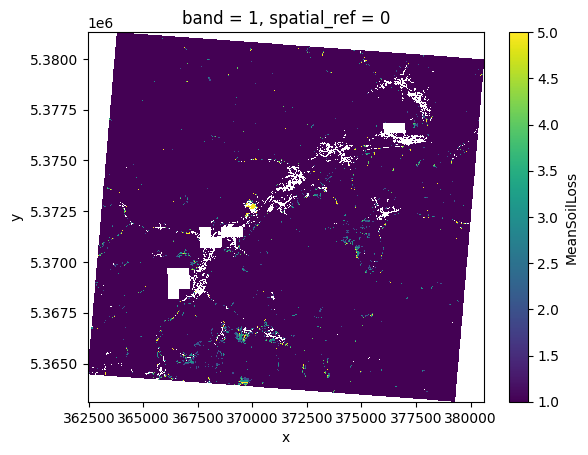

In [19]:
# The plot method actually calls compute()
r.plot()